In [ ]:
import numpy as np
from collections import Counter
from scipy import stats
from math import log2, sqrt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from scipy import stats
import seaborn as sns
from sklearn import metrics
from sklearn import tree
from sklearn import preprocessing
import matplotlib.pyplot as plt
import six
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus
from tqdm.notebook import tqdm_notebook as tqdm
from sklearn.model_selection import GridSearchCV
import plotly.express as px
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV, LeaveOneOut
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
import scipy as sp
import statsmodels.api as sm
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
import xgboost
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import average_precision_score 
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
########################################
from sklearn.cluster import KMeans


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



# Importing Data

In [ ]:
# Importing the csv file
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
#data = pd.read_excel("Dummy dataset.xlsx", engine="openpyxl")
data = pd.read_csv("/content/Task2.csv")
original_data=data.copy(deep=True)
data

,Total O/S,TENOR_@Booking,Loan Term,BOOKING_DATE,MATURITY_DATE,DPD,DOB,AGE,AGE at Maturity,GENDER,Customer Segment
0,"178,630",120,10 Years,7/31/2019,4/3/2029,0,6/23/1983,38.5,48.04,MALE,Salaried
1,"376,445",120,10 Years,3/4/2019,7/3/2028,0,9/30/1963,58.2,67.12,MALE,Salaried
2,"253,984",84,7 Years,5/5/2019,7/3/2025,0,2/24/1965,56.8,63.08,MALE,Salaried
3,"779,620",108,9 Years,4/26/2021,4/25/2030,5,12/1/1983,38.0,46.10,MALE,Self Employed & Professional
4,"103,377",60,5 Years,4/27/2021,4/25/2026,0,8/8/1981,40.3,45.02,MALE,Salaried
...,...,...,...,...,...,...,...,...,...,...,...
38680,8,108,9 Years,2/28/2013,9/27/2021,6,10/25/1975,46.1,54.12,MALE,Salaried
38681,5,96,8 Years,3/4/2014,9/27/2021,6,5/3/1980,41.6,49.05,MALE,Salaried
38682,5,108,9 Years,2/21/2013,9/27/2021,6,7/19/1980,41.4,50.03,MALE,Salaried
38683,2,96,8 Years,2/25/2015,2/27/2023,584,1/3/1985,36.9,44.09,MALE,Salaried


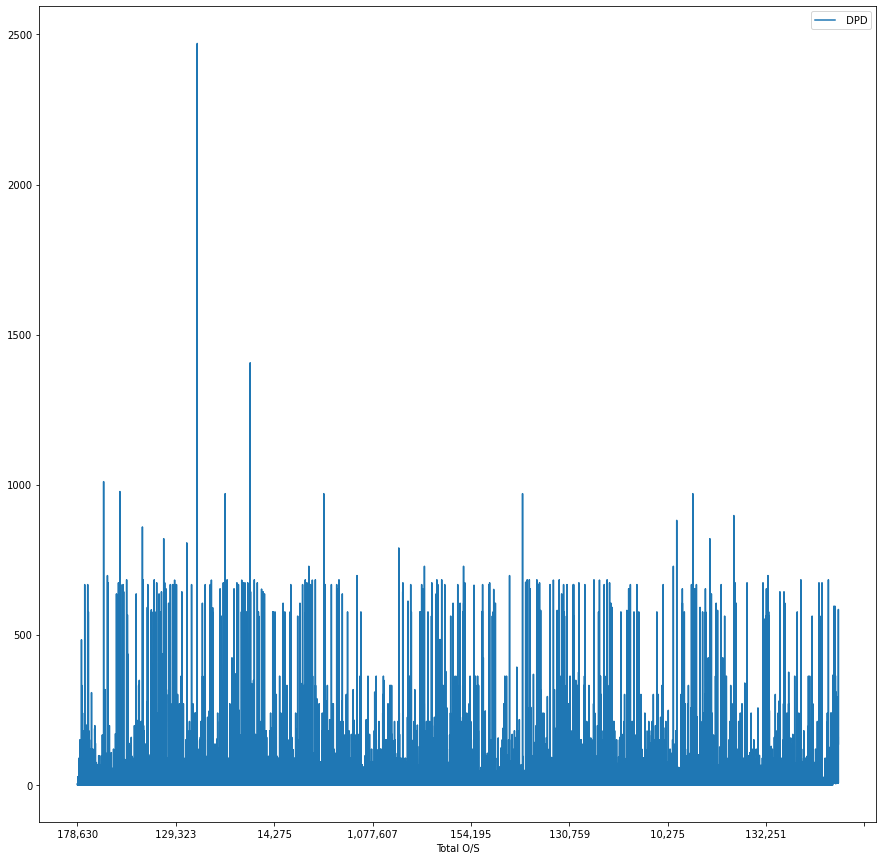

In [ ]:
#fig, ax = plt.subplots() # Create the figure and axes object

# Plot the first x and y axes:
ax=data.plot(x = 'Total O/S', y = ' DPD',figsize=(15,15))
#ax.title('relation between Total O/S and DPD ')

In [ ]:
#data.dropna(inplace=True)


# Feature Engineering

In [ ]:
data.isna().sum()

Total O/S            0
TENOR_@Booking       0
Loan Term            0
BOOKING_DATE         0
MATURITY_DATE        0
 DPD                 0
DOB                  0
AGE                  0
AGE at Maturity     84
GENDER               8
Customer Segment    19
dtype: int64

In [ ]:
#data.drop_duplicates(inplace=True)

In [ ]:
data.duplicated().sum()

823

In [ ]:
data['Loan Term'].value_counts()

5 Years               5674
9 Years               5205
More than 10 Years    4849
8 Years               4781
7 Years               4604
6 Years               4444
10 Years              4148
3 Years               2104
4 Years               2049
2 Years                555
1 Year                 272
Name: Loan Term, dtype: int64

In [ ]:
data['Customer Segment'].value_counts()

Salaried                        28588
Self Employed & Professional    10078
Name: Customer Segment, dtype: int64

In [ ]:
data.isna().sum().sum()

111

<Figure size 432x288 with 0 Axes>

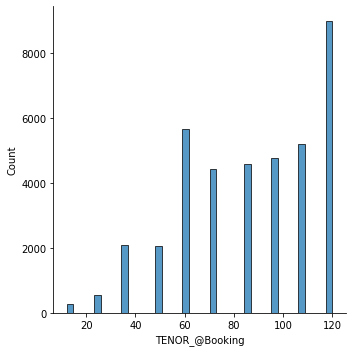

<Figure size 432x288 with 0 Axes>

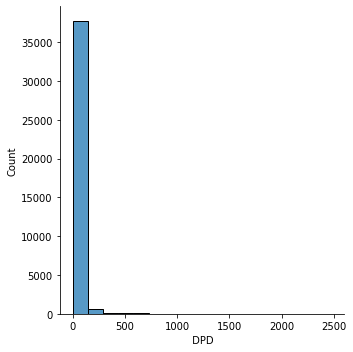

<Figure size 432x288 with 0 Axes>

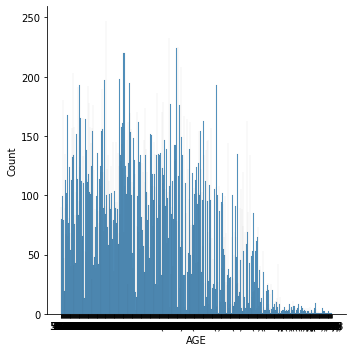

In [ ]:
plt.rcParams.update({'figure.max_open_warning': 0})
for column in ['TENOR_@Booking', ' DPD', 'AGE']:
    plt.figure();             # <==================== here!
    ax = sns.displot(data[column]);

In [ ]:
#X_train, X_test,y_train,y_test =train_test_split(X,y,test_size=0.20,random_state=70)


In [ ]:
data.duplicated().sum()

823

In [ ]:
#data = data.drop_duplicates(ignore_index=True)

In [ ]:
data.isna().sum()

Total O/S            0
TENOR_@Booking       0
Loan Term            0
BOOKING_DATE         0
MATURITY_DATE        0
 DPD                 0
DOB                  0
AGE                  0
AGE at Maturity     84
GENDER               8
Customer Segment    19
dtype: int64

In [ ]:
#data = data.dropna()
#data

In [ ]:
del data['BOOKING_DATE']
del data['MATURITY_DATE']

In [ ]:
data.nunique()

Total O/S           33954
TENOR_@Booking         11
Loan Term              11
 DPD                  278
DOB                 11522
AGE                   573
AGE at Maturity       680
GENDER                  4
Customer Segment        2
dtype: int64

In [ ]:
data['GENDER'].value_counts().sort_values(ascending = False)

MALE      32410
FEMALE     6259
Male          7
Female        1
Name: GENDER, dtype: int64

In [ ]:
data['GENDER'].replace({"Male": "MALE", "Female": "FEMALE"}, inplace=True)

In [ ]:
data['Customer Segment'].value_counts().sort_values(ascending = False)

Salaried                        28588
Self Employed & Professional    10078
Name: Customer Segment, dtype: int64

In [ ]:
data['Loan Term'].value_counts().sort_values(ascending = False)

5 Years               5674
9 Years               5205
More than 10 Years    4849
8 Years               4781
7 Years               4604
6 Years               4444
10 Years              4148
3 Years               2104
4 Years               2049
2 Years                555
1 Year                 272
Name: Loan Term, dtype: int64

In [ ]:
data['DOB'].value_counts().sort_values(ascending = False)

10/15/1974    94
#VALUE!       84
1/1/1984      72
1/1/1985      64
8/2/1973      48
              ..
11/7/1986      1
12/27/1983     1
11/18/1976     1
5/27/1957      1
6/3/1994       1
Name: DOB, Length: 11522, dtype: int64

In [ ]:
str(data['DOB'].iloc[112]).split('/')[0]

'#VALUE!'

In [ ]:
#data = data.drop([112],axis=0)

In [ ]:
data.head(113)

,Total O/S,TENOR_@Booking,Loan Term,DPD,DOB,AGE,AGE at Maturity,GENDER,Customer Segment
0,"178,630",120,10 Years,0,6/23/1983,38.5,48.04,MALE,Salaried
1,"376,445",120,10 Years,0,9/30/1963,58.2,67.12,MALE,Salaried
2,"253,984",84,7 Years,0,2/24/1965,56.8,63.08,MALE,Salaried
3,"779,620",108,9 Years,5,12/1/1983,38.0,46.10,MALE,Self Employed & Professional
4,"103,377",60,5 Years,0,8/8/1981,40.3,45.02,MALE,Salaried
...,...,...,...,...,...,...,...,...,...
108,"35,006",84,7 Years,0,2/27/1980,41.8,48.07,MALE,Salaried
109,"41,802",60,5 Years,0,1/3/1979,42.9,47.09,MALE,Salaried
110,"104,507",36,3 Years,15,2/17/1990,31.8,34.08,MALE,Self Employed & Professional
111,"53,000",120,10 Years,0,7/17/1991,30.4,40.03,MALE,Salaried


In [ ]:
for i in range(len(data)):
  try:
    data['DOB'][i] = str(data['DOB'][i]).split('/')[0]
  except:
    print(i)
    #data = data.drop([i])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
data = data.rename(columns={'DOB': 'MOB',' DPD':'DPD'})
data

,Total O/S,TENOR_@Booking,Loan Term,DPD,MOB,AGE,AGE at Maturity,GENDER,Customer Segment
0,"178,630",120,10 Years,0,6,38.5,48.04,MALE,Salaried
1,"376,445",120,10 Years,0,9,58.2,67.12,MALE,Salaried
2,"253,984",84,7 Years,0,2,56.8,63.08,MALE,Salaried
3,"779,620",108,9 Years,5,12,38.0,46.10,MALE,Self Employed & Professional
4,"103,377",60,5 Years,0,8,40.3,45.02,MALE,Salaried
...,...,...,...,...,...,...,...,...,...
38680,8,108,9 Years,6,10,46.1,54.12,MALE,Salaried
38681,5,96,8 Years,6,5,41.6,49.05,MALE,Salaried
38682,5,108,9 Years,6,7,41.4,50.03,MALE,Salaried
38683,2,96,8 Years,584,1,36.9,44.09,MALE,Salaried


In [ ]:
for i in range(len(data)):
  try:
    data['Total O/S'][i] = data['Total O/S'][i].replace(',', '')
  except:
    print(i)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
data['Total O/S'] = data['Total O/S'].astype(float)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38685 entries, 0 to 38684
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Total O/S         38685 non-null  float64
 1   TENOR_@Booking    38685 non-null  int64  
 2   Loan Term         38685 non-null  object 
 3   DPD               38685 non-null  int64  
 4   MOB               38685 non-null  object 
 5   AGE               38685 non-null  object 
 6   AGE at Maturity   38601 non-null  object 
 7   GENDER            38677 non-null  object 
 8   Customer Segment  38666 non-null  object 
dtypes: float64(1), int64(2), object(6)
memory usage: 2.7+ MB


In [ ]:
data['DPD'].value_counts().head(20)

0      30464
5       1250
27       988
3        980
58       470
13       465
89       284
15       251
44       144
119      136
7        123
4        110
75       105
6        101
25        99
34        94
2         87
150       82
36        82
10        72
Name: DPD, dtype: int64

In [ ]:
data['DPD'].max()

2470

[Text(0.5, 0, 'number of days after loan deadline')]

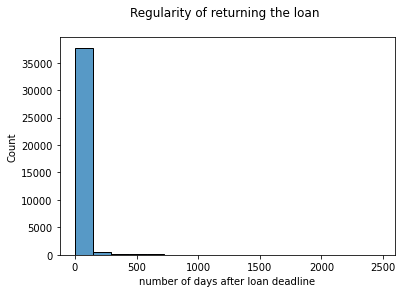

In [ ]:
ax=sns.histplot(data,x='DPD')
ax.set_title("Regularity of returning the loan \n")
ax.set(xlabel="number of days after loan deadline")

In [ ]:
def len_df(df):
    return len(df[df['MOB'] == '#VALUE!'])

In [ ]:
data['AGE'] = data['AGE'].replace(' ', '')

In [ ]:
data.isna().sum()

Total O/S            0
TENOR_@Booking       0
Loan Term            0
DPD                  0
MOB                  0
AGE                  0
AGE at Maturity     84
GENDER               8
Customer Segment    19
dtype: int64

In [ ]:
data = data.replace('#VALUE!', str("NaN"))

In [ ]:
data['MOB']=data['MOB'].astype(float)

In [ ]:
data['Month_of_date'] = pd.cut(x=data['MOB'], bins=[0, 3, 6, 9,12],
                    labels=['1 to 3', '3 to 6', '6 to 9','9 to 12'])
 
# We can check the frequency of each bin
print(data['Month_of_date'].unique())

['3 to 6', '6 to 9', '1 to 3', '9 to 12', NaN]
Categories (4, object): ['1 to 3' < '3 to 6' < '6 to 9' < '9 to 12']


In [ ]:
for i in range(len(data)):
  if("(0.9)" in data['AGE'][i]):
    data['AGE'][i] = float("NaN")
  elif("(" in data['AGE'][i]):
    data['AGE'][i] = data['AGE'][i].split(")")[0].split("(")[1]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
for i in range(len(data)):
  try:
    data['AGE'][i] = float(data['AGE'][i])
  except:
    print(i)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
data.dtypes

Total O/S            float64
TENOR_@Booking         int64
Loan Term             object
DPD                    int64
MOB                  float64
AGE                   object
AGE at Maturity       object
GENDER                object
Customer Segment      object
Month_of_date       category
dtype: object

In [ ]:
data['Age'] = pd.cut(x=data['AGE'], bins=[10, 20, 30, 40,50,60,70,80],
                    labels=['10 to 20', '20 to 30', '30 to 40','40 to 50','50 to 60','60 to 70','70 to 80'])
 
# We can check the frequency of each bin
print(data['Age'].unique())

['30 to 40', '50 to 60', '40 to 50', '20 to 30', '60 to 70', NaN, '10 to 20', '70 to 80']
Categories (7, object): ['10 to 20' < '20 to 30' < '30 to 40' < '40 to 50' < '50 to 60' < '60 to 70' <
                         '70 to 80']


In [ ]:
data

,Total O/S,TENOR_@Booking,Loan Term,DPD,MOB,AGE,AGE at Maturity,GENDER,Customer Segment,Month_of_date,Age
0,178630.0,120,10 Years,0,6.0,38.5,48.04,MALE,Salaried,3 to 6,30 to 40
1,376445.0,120,10 Years,0,9.0,58.2,67.12,MALE,Salaried,6 to 9,50 to 60
2,253984.0,84,7 Years,0,2.0,56.8,63.08,MALE,Salaried,1 to 3,50 to 60
3,779620.0,108,9 Years,5,12.0,38,46.10,MALE,Self Employed & Professional,9 to 12,30 to 40
4,103377.0,60,5 Years,0,8.0,40.3,45.02,MALE,Salaried,6 to 9,40 to 50
...,...,...,...,...,...,...,...,...,...,...,...
38680,8.0,108,9 Years,6,10.0,46.1,54.12,MALE,Salaried,9 to 12,40 to 50
38681,5.0,96,8 Years,6,5.0,41.6,49.05,MALE,Salaried,3 to 6,40 to 50
38682,5.0,108,9 Years,6,7.0,41.4,50.03,MALE,Salaried,6 to 9,40 to 50
38683,2.0,96,8 Years,584,1.0,36.9,44.09,MALE,Salaried,1 to 3,30 to 40


In [ ]:
dff=data.copy(deep=True)

In [ ]:
data['Dpd'] = pd.cut(x=data['DPD'], bins=[-1, 0, 30, 60,90,120,3000],
                    labels=['On Time', 'within 1 month', 'within 2 months','within 3 months','within 4 months','more than 4 months'])
 
# We can check the frequency of each bin
print(data['Dpd'].unique())

['On Time', 'within 1 month', 'within 3 months', 'within 2 months', 'more than 4 months', 'within 4 months']
Categories (6, object): ['On Time' < 'within 1 month' < 'within 2 months' < 'within 3 months' <
                         'within 4 months' < 'more than 4 months']


In [ ]:
del data['AGE']
del data['AGE at Maturity']
del data['MOB']
del data['DPD']
del data['TENOR_@Booking']

In [ ]:
data

,Total O/S,Loan Term,GENDER,Customer Segment,Month_of_date,Age,Dpd
0,178630.0,10 Years,MALE,Salaried,3 to 6,30 to 40,On Time
1,376445.0,10 Years,MALE,Salaried,6 to 9,50 to 60,On Time
2,253984.0,7 Years,MALE,Salaried,1 to 3,50 to 60,On Time
3,779620.0,9 Years,MALE,Self Employed & Professional,9 to 12,30 to 40,within 1 month
4,103377.0,5 Years,MALE,Salaried,6 to 9,40 to 50,On Time
...,...,...,...,...,...,...,...
38680,8.0,9 Years,MALE,Salaried,9 to 12,40 to 50,within 1 month
38681,5.0,8 Years,MALE,Salaried,3 to 6,40 to 50,within 1 month
38682,5.0,9 Years,MALE,Salaried,6 to 9,40 to 50,within 1 month
38683,2.0,8 Years,MALE,Salaried,1 to 3,30 to 40,more than 4 months


In [ ]:
data.isna().sum()

Total O/S             0
Loan Term             0
GENDER                8
Customer Segment     19
Month_of_date        84
Age                 145
Dpd                   0
dtype: int64

In [ ]:
data.duplicated().sum()

1075

In [ ]:
data.dropna(inplace=True)

In [ ]:
data.drop_duplicates(inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37468 entries, 0 to 38684
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Total O/S         37468 non-null  float64 
 1   Loan Term         37468 non-null  object  
 2   GENDER            37468 non-null  object  
 3   Customer Segment  37468 non-null  object  
 4   Month_of_date     37468 non-null  category
 5   Age               37468 non-null  category
 6   Dpd               37468 non-null  category
dtypes: category(3), float64(1), object(3)
memory usage: 1.5+ MB


[Text(0.5, 0, 'loan value')]

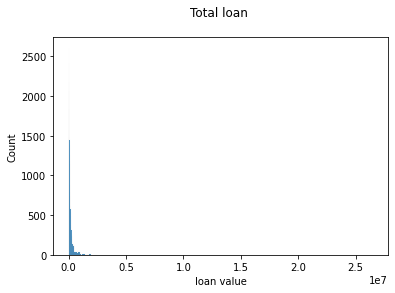

In [ ]:
ax=sns.histplot(data,x='Total O/S')
ax.set_title("Total loan \n")
ax.set(xlabel="loan value")

In [ ]:
data['Total O/S'].describe()

count    3.746800e+04
mean     1.793576e+05
std      3.890671e+05
min      0.000000e+00
25%      3.596950e+04
50%      9.047750e+04
75%      1.842212e+05
max      2.652674e+07
Name: Total O/S, dtype: float64

In [ ]:
data['Total O_S'] = pd.cut(x=data['Total O/S'], bins=[-1, 36000, 90000,184000,27000000],
                    labels=['Less than 36000', 'Less than 90000', 'Less than 184000','Less than 27000000'])
 
# We can check the frequency of each bin
print(data['Total O_S'].unique())

['Less than 184000', 'Less than 27000000', 'Less than 36000', 'Less than 90000']
Categories (4, object): ['Less than 36000' < 'Less than 90000' < 'Less than 184000' <
                         'Less than 27000000']


In [ ]:
del data['Total O/S']

In [ ]:
#categorical = ['Loan Term','GENDER','Customer Segment','Month_of_date','Age']
categorical = ['Loan Term','GENDER','Customer Segment','Month_of_date','Age','Total O_S']

X = data[categorical]
#X = pd.concat((data[categorical], data['Total O/S']), axis=1) ## Just sort them, no need for encoding
y = data['Dpd']

X_train , X_test , y_train , y_test = train_test_split(X,y,test_size = 0.2 , random_state = 75, shuffle=True)

In [ ]:
X_train = pd.get_dummies(X_train, columns = categorical, drop_first=True)
X_test = pd.get_dummies(X_test, columns = categorical, drop_first=True)
y_train = pd.get_dummies(y_train, columns = ['Dpd'], drop_first=True)
y_test = pd.get_dummies(y_test, columns = ['Dpd'], drop_first=True)

print(X_train.shape)
print(X_test.shape)

(29974, 24)
(7494, 24)


In [ ]:
clf=RandomForestClassifier(n_estimators = 100, random_state = 43)
#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7710168134507606


In [ ]:
from sklearn.model_selection import GridSearchCV
params={'max_depth': np.arange(4, 10,1)}
rf_c = RandomForestClassifier()
g_rf_c= GridSearchCV(rf_c, params)
g_rf_c.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': array([4, 5, 6, 7, 8, 9])})

In [ ]:
g_rf_c.score(X_train, y_train)

0.7859144591979715

In [ ]:
g_rf_c.score(X_test, y_test)

0.7779556978916466

In [ ]:
#KNN
clf = KNeighborsClassifier()
scores = cross_val_score(clf, X_train, y_train, cv=5)
print('Average Score for KNN = {}'.format(np.round(scores.mean()*100,2)))

#DTrees
clf = tree.DecisionTreeClassifier()
scores = cross_val_score(clf, X_train, y_train, cv=5)
print('Average Score for DTrees = {}'.format(np.round(scores.mean()*100,2)))

Average Score for KNN = 77.16
Average Score for DTrees = 77.75


In [ ]:
X1 = [1, 2, 3, 4]
loo = LeaveOneOut()
for train, test in loo.split(X1):
    print("%s %s" % (train, test))

[1 2 3] [0]
[0 2 3] [1]
[0 1 3] [2]
[0 1 2] [3]


In [ ]:
#To uncomment

clf = KNeighborsClassifier()
scores = cross_val_score(clf, X_train, y_train, cv=loo) #notice the difference
print('Average Score for KNN = {}'.format(np.round(scores.mean()*100,2)))

In [ ]:
X_train

In [ ]:
#X_Y_train = X_train +y_train
#X_Y_test = X_test +y_test
Xs=pd.concat((X_train, X_test))

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=9)
pca.fit(Xs)

In [ ]:
print(pca.components_)

In [ ]:
print(pca.explained_variance_)

In [ ]:
pca = PCA(n_components=7)
pca.fit(Xs)
projected_Train = pca.transform(Xs)
print("original shape:   ", Xs.shape)
print("transformed shape:", projected_Train.shape)

In [ ]:
from sklearn.cluster import KMeans
model = KMeans(3) 
model.fit(projected_Train)
print(model.cluster_centers_)

In [ ]:
plt.scatter(projected_Train[:,0],projected_Train[:,1], c=model.labels_);
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], s=100, color="red"); # Show the centres

# The data Plots

In [ ]:
# from sklearn.metrics import accuracy_score
# acc=accuracy_score(y_train, model.labels_)
# print("Accuracy score is", acc)

In [ ]:
data

In [ ]:
data['Customer Segment'].value_counts().sort_values(ascending = False)

In [ ]:
sns.countplot(x='Customer Segment', data=data, palette='Set2')
plt.show()

In [ ]:
data['GENDER'].value_counts().sort_values(ascending = False)

In [ ]:
sns.countplot(x='GENDER', data=data, palette='Set2')
plt.show()

In [ ]:
data['Dpd'].value_counts().sort_values(ascending = False)

In [ ]:
sns.countplot(x='Dpd', data=data, palette='Set2')
plt.show()

In [ ]:
data['Total O_S'].value_counts().sort_values(ascending = False)

In [ ]:
sns.countplot(x='Total O_S', data=data, palette='Set2')
plt.show()

In [ ]:
data['Loan Term'].value_counts().sort_values(ascending = False)

In [ ]:
sns.countplot(x='Loan Term', data=data, palette='Set2')
plt.show()

In [ ]:
data['Month_of_date'].value_counts().sort_values(ascending = False)

In [ ]:
sns.countplot(x='Month_of_date', data=data, palette='Set2')
plt.show()

In [ ]:
data['Month_of_date'].value_counts().sort_values(ascending = False)

In [ ]:
sns.countplot(x='Age', data=data, palette='Set2')
plt.show()

In [ ]:
px.scatter(data, x='Month_of_date', y='Customer Segment',
            title="Loan Term vs Age",
                   labels={
                     "G3": "Grade for final exam",
                 },)

In [ ]:
data

In [ ]:
df_disc_tmp = data.copy(deep=True)
df_disc_tmp['Dpd'] = df_disc_tmp['Dpd'].apply(lambda x: 1 if x =="On Time" else 0)
df_disc_tmp['returning loan']=df_disc_tmp.Dpd

In [ ]:
ax=sns.histplot(df_disc_tmp, x='Loan Term', hue='returning loan')
ax.set_title('Total vs returning loan in more than 4 months')

In [ ]:
details = data.apply(lambda x : True
            if (x['Loan Term'] == "1 Year" and x['Dpd'] == "On Time") else False, axis = 1)
  
            #Salaried
            #Self Employed & Professional
# Count number of True in the series
num_rows = len(details[details == True].index)
  
print('Number of Rows in dataframe in which College is Geu : ',
      num_rows )